In [1]:
import os
import sys

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
import altair as alt
from altair import datum
from tqdm.auto import tqdm, trange

%run constants.py

%matplotlib inline
print("Versions:")
print("  Python: %s" % sys.version)
for module in [pd, np, sns, sklearn, alt]:
    print("  %s: %s" %(module.__name__, module.__version__))

Versions:
  Python: 3.8.2 (default, Jul 16 2020, 14:00:26) 
[GCC 9.3.0]
  pandas: 1.1.0
  numpy: 1.19.1
  seaborn: 0.10.1
  sklearn: 0.23.2
  altair: 4.1.0


# EDA - Pairwise relationships

I want to look at the correlation between some variables. I'm interested in seeing if there's any obvious effects from some variables on the target, so we'll look at them one-by-one.

## Target and previous month correlation

We saw from the benchmark model that this has a strong prediction value since using it alone gives a fairly good score. Let's check this relationship with previous months too now and try a better visualization technique.

In [2]:
sales_train = pd.read_parquet(os.path.join(PROCESSED_DATA_DIR, 'sales-train-by-month.parquet'))

In [3]:
sales_train_with_lags = sales_train.copy()
for lag in trange(1, 33):
    sales_train_lagged = sales_train.rename(columns={'item_cnt': 'item_cnt_lag_%d' % lag})
    sales_train_lagged['date_block_num'] = sales_train_lagged['date_block_num'] + lag
    sales_train_with_lags = sales_train_with_lags.merge(sales_train_lagged, on=['item_id', 'shop_id', 'date_block_num'], how='left')
sales_train_with_lags.fillna(0, inplace=True)
sales_train_with_lags.describe()

,date_block_num,shop_id,item_id,item_cnt,item_cnt_lag_1,item_cnt_lag_2,item_cnt_lag_3,item_cnt_lag_4,item_cnt_lag_5,item_cnt_lag_6,...,item_cnt_lag_23,item_cnt_lag_24,item_cnt_lag_25,item_cnt_lag_26,item_cnt_lag_27,item_cnt_lag_28,item_cnt_lag_29,item_cnt_lag_30,item_cnt_lag_31,item_cnt_lag_32
count,1.600855e+06,1.600855e+06,1.600855e+06,1.600855e+06,1.600855e+06,1.600855e+06,1.600855e+06,1.600855e+06,1.600855e+06,1.600855e+06,...,1.600855e+06,1.600855e+06,1.600855e+06,1.600855e+06,1.600855e+06,1.600855e+06,1.600855e+06,1.600855e+06,1.600855e+06,1.600855e+06
mean,1.473702e+01,3.296987e+01,1.067828e+04,2.267546e+00,1.458332e+00,1.295256e+00,1.159287e+00,1.052748e+00,9.664304e-01,8.929091e-01,...,1.434508e-01,1.189439e-01,9.653904e-02,7.489685e-02,6.030215e-02,4.770138e-02,3.493508e-02,2.580871e-02,1.879933e-02,1.011460e-02
std,9.513026e+00,1.641684e+01,6.238855e+03,8.668920e+00,8.008558e+00,7.649652e+00,7.445742e+00,7.373295e+00,7.235960e+00,7.076944e+00,...,3.571931e+00,3.208845e+00,2.906958e+00,2.391624e+00,2.061003e+00,1.698443e+00,1.041183e+00,7.371794e-01,6.585471e-01,4.160397e-01
min,0.000000e+00,2.000000e+00,3.000000e+01,-2.200000e+01,-2.200000e+01,-2.200000e+01,-4.000000e+00,-4.000000e+00,-2.000000e+00,-4.000000e+00,...,-2.000000e+00,-1.000000e+00,-1.000000e+00,-2.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,6.000000e+00,2.100000e+01,5.043000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.400000e+01,3.100000e+01,1.049200e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.300000e+01,4.700000e+01,1.605900e+04,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.300000e+01,5.900000e+01,2.216700e+04,2.253000e+03,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03,...,9.890000e+02,9.780000e+02,9.500000e+02,8.200000e+02,7.990000e+02,7.660000e+02,5.040000e+02,2.590000e+02,2.590000e+02,1.250000e+02


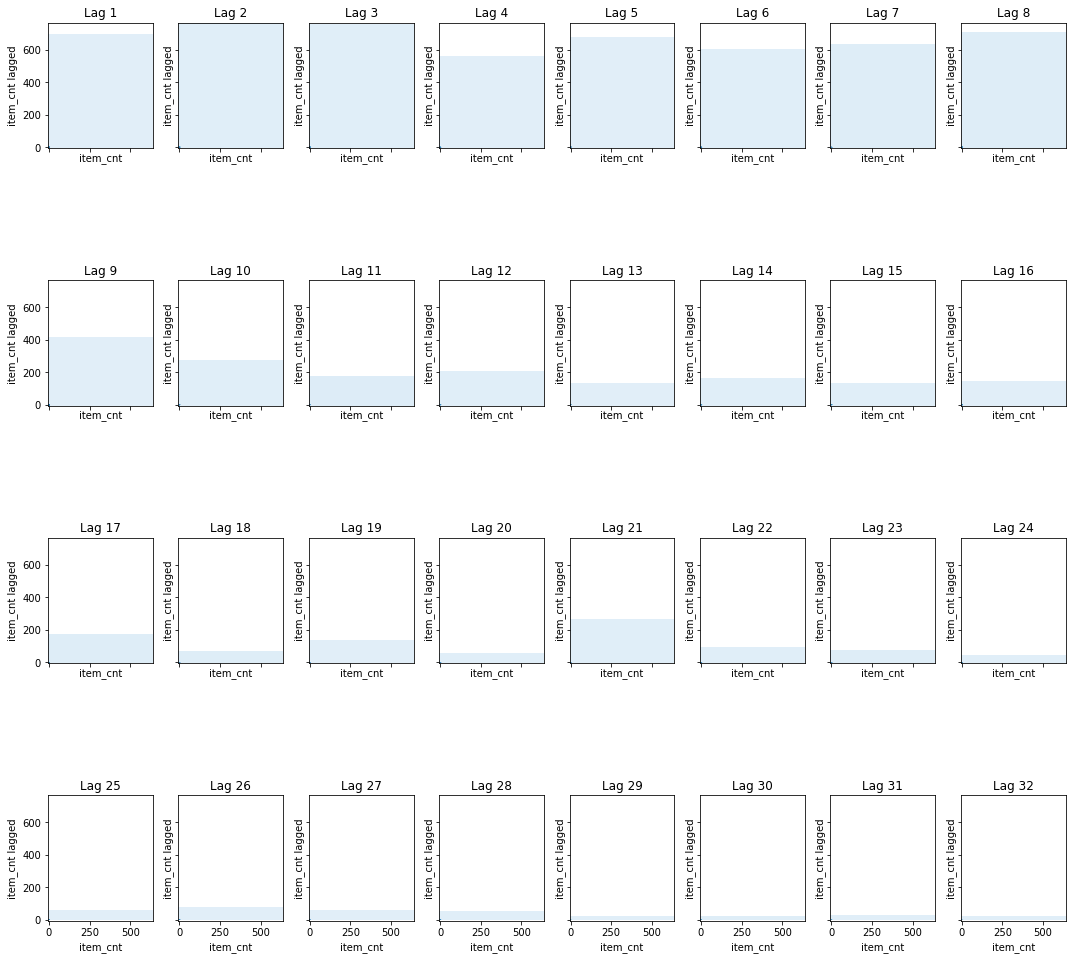

In [7]:
r, c = 4, 8
f, axes = plt.subplots(r, c, figsize=(15, 15), sharex=True, sharey=True)
tmp_df = sales_train_with_lags.sample(n=10_000) # plotting was taking too long, so I started using a sample
for lag in trange(1, 33):
    ax = axes[(lag - 1) // c][(lag - 1) % c]
    sns.kdeplot(data=tmp_df['item_cnt'].values, data2=tmp_df['item_cnt_lag_%d' % lag].values, ax=ax, shade=True )
    ax.set(aspect='equal', xlabel='item_cnt', ylabel='item_cnt lagged', title= 'Lag %d' % lag)
plt.tight_layout()

Ok, we can't see anything. Let's clip the dataset between 0 and 20 again.

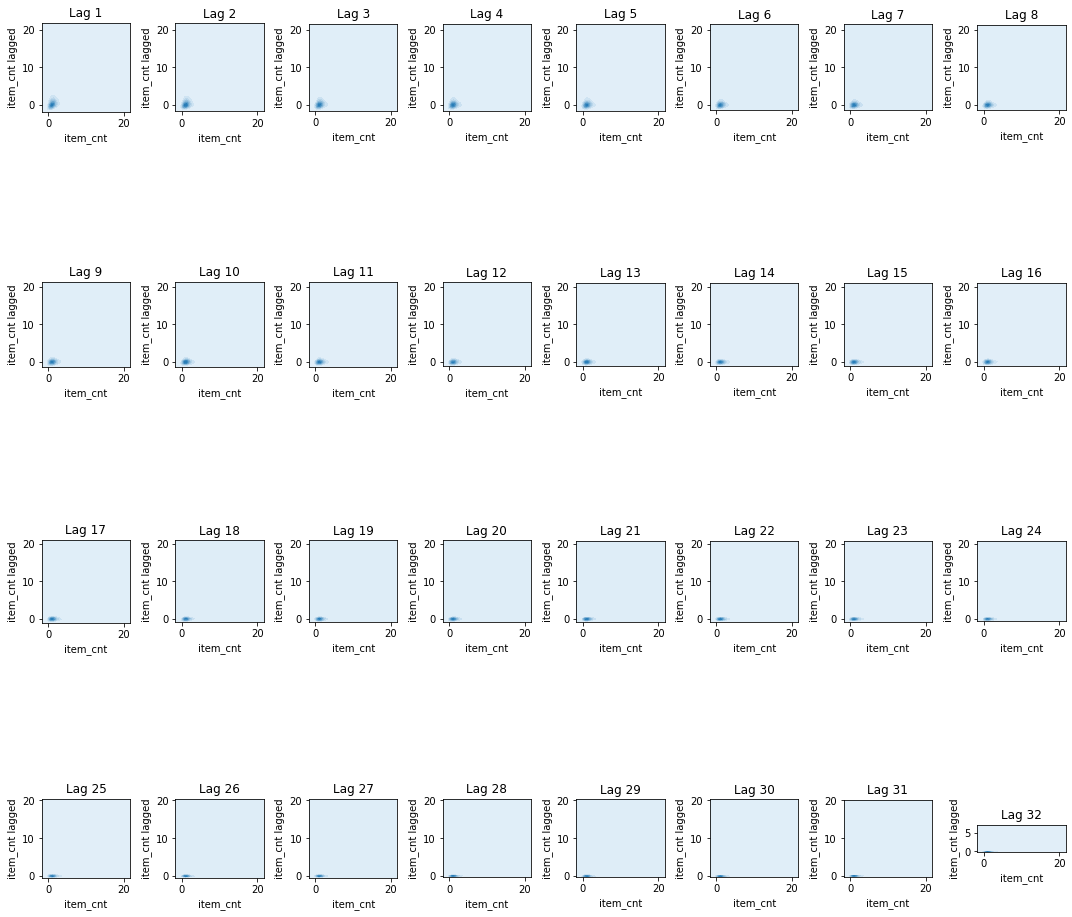

In [8]:
r, c = 4, 8
f, axes = plt.subplots(r, c, figsize=(15, 15))
tmp_df = np.clip(sales_train_with_lags, 0, 20).sample(n=10_000)
for lag in trange(1, 33):
    ax = axes[(lag - 1) // c][(lag - 1) % c]
    sns.kdeplot(data=tmp_df['item_cnt'].values, data2=tmp_df['item_cnt_lag_%d' % lag].values, ax=ax, shade=True )
    ax.set(aspect='equal', xlabel='item_cnt', ylabel='item_cnt lagged', title= 'Lag %d' % lag)
plt.tight_layout()

Two important points here: we can see that the correlation between input and output gets very weak at the end (around lag 21), certainly because of the small amount of data the more we increase the lag. It also cause the small samples to dominating the plots, so I'll remove them and try again.

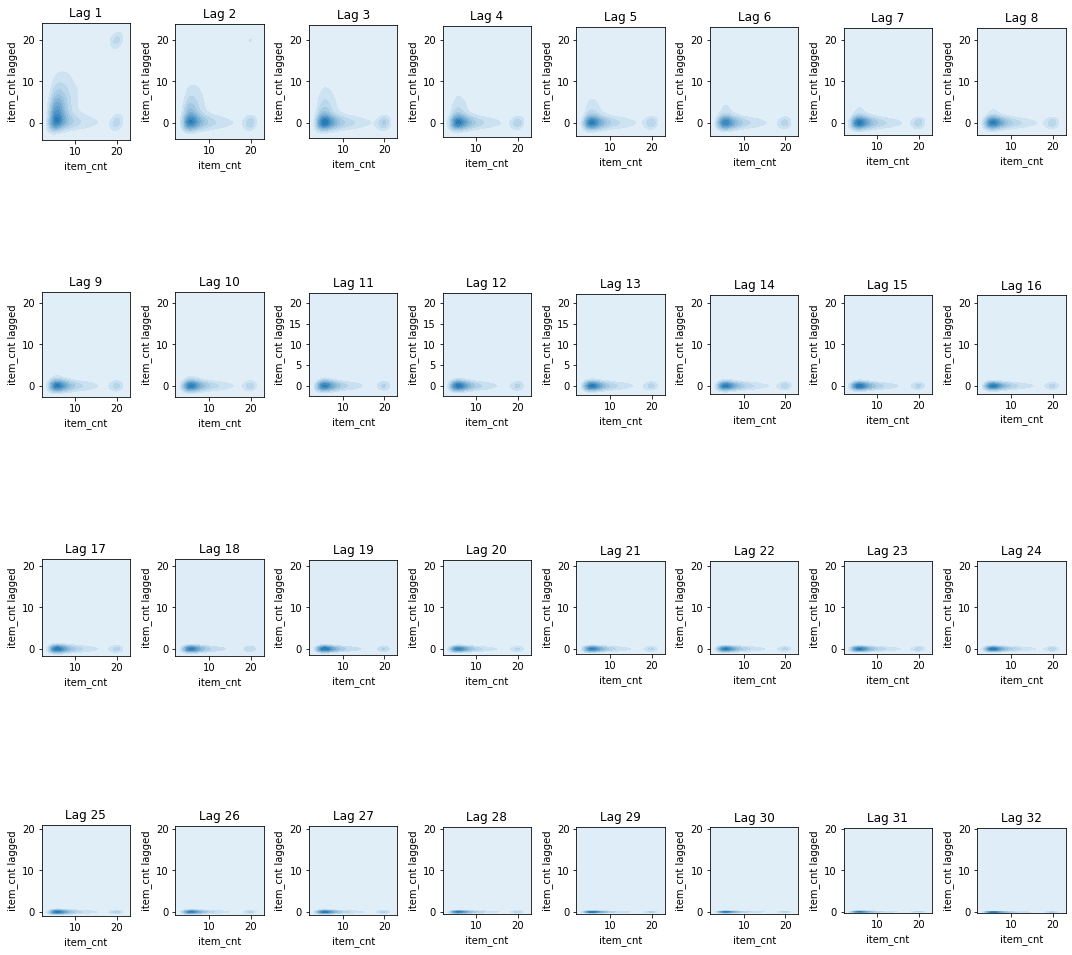

In [9]:
r, c = 4, 8
f, axes = plt.subplots(r, c, figsize=(15, 15))
tmp_df = np.clip(sales_train_with_lags[sales_train_with_lags['item_cnt'] >= 5].sample(n=10_000), 0, 20)
for lag in trange(1, 33):
    ax = axes[(lag - 1) // c][(lag - 1) % c]
    sns.kdeplot(data=tmp_df['item_cnt'].values, data2=tmp_df['item_cnt_lag_%d' % lag].values, ax=ax, shade=True )
    ax.set(aspect='equal', xlabel='item_cnt', ylabel='item_cnt lagged', title= 'Lag %d' % lag)
plt.tight_layout()

We can see that starting from lag 9, most of the `lagged` values stay near zero, so basically more noise than signal.